# Cálculo de propiedades fundamentales

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Cálculo v-shale (Shale Volume)

In [51]:
def shale_volume(gamma_ray, gamma_ray_max, gamma_ray_min):
    vshale = (gamma_ray - gamma_ray_min) / (gamma_ray_max - gamma_ray_min)
    return vshale

In [52]:
shale_volume(120, 200, 15)

0.5675675675675675

### Cálculo Porosidad Densidad

In [53]:
def density_porosity(density, density_matrix, density_fluid):
    phi = (density_matrix - density) / (density_matrix - density_fluid)
    return phi

In [54]:
density_porosity(2.45, 2.65, 1.0)

0.12121212121212106

### Cálculo Saturación de Agua

Archie:

In [55]:
def sw_archie(porosity, rt, rw, archieA, archieM, archieN):
    sw = ((archieA / (porosity ** archieM)) * (rw/rt)) ** (1 / archieN)
    return sw

In [56]:
sw_archie(0.1, 12, 0.1, 1, 2, 2)

0.9128709291752768

Simandoux:

In [57]:
def sw_simandoux(phie, rt, rw, archieA, archieM, archieN, vshale, rshale):
    A = (1-vshale) * archieA * rw / (phie ** archieM)
    B = A * vshale / (2*rshale)
    C = A / rt

    sw = ((B**2 + C)**0.5 - B) ** (2 / archieN)
    return sw

In [58]:
sw_simandoux(0.1, 12, 0.1, 1, 2, 2, 0.5, 2)

0.273494110535326

## Trabajar con registros de pozo

In [59]:
well = pd.read_csv('Datos/15_9-19.csv', header=0, skiprows=[1])

In [60]:
well.head()

,DEPTH,CALI,COAL,DT,DT_LOG,DTS,DTS_LOG,GR,NPHI,PHIE,PHIEC,PHIT,PHITC,RHOB,RHOB_LOG,RT,RW,TEMP
0,3500.0183,9.315,0,76.7292,76.7292,157.1754,157.1754,36.621,0.1542,0.1122,0.1098,0.1209,0.1186,2.4602,2.460,1.791,0.0211,94.5855
1,3500.1707,9.324,0,77.2473,77.2473,158.9566,158.9566,36.374,0.1694,0.1074,0.1060,0.1159,0.1146,2.4680,2.468,1.756,0.0211,94.5897
2,3500.3231,9.338,0,77.8462,77.8462,159.7642,159.7642,30.748,0.1776,0.1082,0.1079,0.1127,0.1125,2.4730,2.473,1.720,0.0211,94.5940
3,3500.4755,9.329,0,78.3571,78.3571,158.7547,158.7547,29.795,0.1767,0.1254,0.1226,0.1292,0.1264,2.4471,2.447,1.696,0.0211,94.5982
4,3500.6279,9.328,0,78.6560,78.6560,157.1320,157.1320,27.346,0.1662,0.1278,0.1249,0.1299,0.1270,2.4460,2.446,1.697,0.0211,94.6025


In [61]:
well.describe()

,DEPTH,CALI,COAL,DT,DT_LOG,DTS,DTS_LOG,GR,NPHI,PHIE,PHIEC,PHIT,PHITC,RHOB,RHOB_LOG,RT,RW,TEMP
count,4101.000000,4101.000000,4101.000000,4101.000000,4101.000000,4101.000000,4101.000000,4068.000000,4100.000000,4101.000000,4101.000000,4101.000000,4101.000000,4101.000000,4101.000000,4101.000000,4101.000000,4101.000000
mean,3812.438300,-39.382264,-47.745428,29.306091,29.306091,95.615430,95.615430,-10.369315,-47.554209,-63.005111,-63.006214,-62.976291,-62.977405,-46.146818,-45.902606,-40.770159,-63.073705,50.191528
std,180.441761,215.015625,213.141113,230.816256,230.816256,247.616496,247.616496,260.581607,213.211573,243.051135,243.050849,243.058618,243.058329,215.209740,214.695840,217.897542,243.033313,235.131347
min,3500.018300,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
25%,3656.228300,8.259000,0.000000,71.458100,71.458100,127.520000,127.520000,20.984500,0.133300,0.021700,0.021600,0.054100,0.054100,2.335900,2.336000,1.428000,0.018900,98.096500
50%,3812.438300,8.801000,0.000000,76.994300,76.994300,136.150900,136.150900,35.562500,0.172900,0.062400,0.061800,0.109900,0.108700,2.460000,2.460000,1.996000,0.019600,102.437600
75%,3968.648300,9.209000,0.000000,84.525400,84.525400,159.223800,159.223800,62.676500,0.227000,0.139100,0.135900,0.170600,0.168000,2.546100,2.546000,4.254000,0.020300,106.778600
max,4124.858300,10.370000,0.000000,131.954900,131.954900,275.039900,275.039900,1567.590000,15.698900,0.380100,0.338500,0.418900,0.380300,3.019400,3.020000,1920.751000,0.021100,111.119700


In [62]:
well.replace(-999.00, np.nan, inplace=True)

In [63]:
well.describe()

,DEPTH,CALI,COAL,DT,DT_LOG,DTS,DTS_LOG,GR,NPHI,PHIE,PHIEC,PHIT,PHITC,RHOB,RHOB_LOG,RT,RW,TEMP
count,4101.000000,3905.000000,3905.0,3905.000000,3905.000000,3905.000000,3905.000000,3817.000000,3904.000000,3842.000000,3842.000000,3842.000000,3842.000000,3902.000000,3903.000000,3905.000000,3842.000000,3905.000000
mean,3812.438300,8.782929,0.0,80.918894,80.918894,150.556435,150.556435,54.641506,0.213049,0.092930,0.091753,0.123694,0.122504,2.448205,2.448222,7.325373,0.019713,102.852614
std,180.441761,0.535479,0.0,14.104999,14.104999,34.903100,34.903100,62.073152,0.370567,0.073644,0.072675,0.071207,0.070314,0.126630,0.126652,38.090478,0.000748,4.774848
min,3500.018300,6.883000,0.0,58.604200,58.604200,112.136400,112.136400,3.761000,0.055000,0.010000,0.010000,0.010000,0.010000,1.991100,1.991000,0.075000,0.018500,94.585500
25%,3656.228300,8.284000,0.0,72.259900,72.259900,128.474400,128.474400,24.211000,0.139800,0.031300,0.031200,0.062200,0.061925,2.362025,2.362000,1.558100,0.019100,98.719100
50%,3812.438300,8.843000,0.0,77.531600,77.531600,137.789900,137.789900,37.503000,0.175900,0.069450,0.068800,0.115450,0.114400,2.466900,2.467000,2.081000,0.019700,102.852600
75%,3968.648300,9.233000,0.0,84.813900,84.813900,160.724000,160.724000,67.172000,0.233225,0.145500,0.142400,0.177625,0.174200,2.551000,2.551000,4.500000,0.020400,106.986200
max,4124.858300,10.370000,0.0,131.954900,131.954900,275.039900,275.039900,1567.590000,15.698900,0.380100,0.338500,0.418900,0.380300,3.019400,3.020000,1920.751000,0.021100,111.119700


(0.0, 300.0)

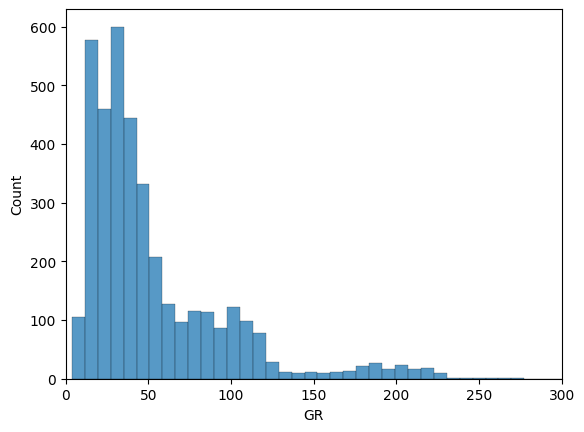

In [64]:
sns.histplot(well['GR'], bins=200)
plt.xlim(0, 300)

Cálculo de vshale

In [65]:
q99_GR = well['GR'].quantile(0.99)
q01_GR = well['GR'].quantile(0.01)

q99_GR, q01_GR

(217.43692000000001, 9.26496)

In [66]:
well['VSHALE'] = shale_volume(well['GR'],q99_GR, q01_GR)

In [67]:
well['PHI'] = density_porosity(well['RHOB'], 2.65, 1.0)

Porosidad efectiva PHIE

In [68]:
well['PHIE_CALC'] = well['PHI'] - (well['VSHALE']*0.3)

In [70]:
well.head()

,DEPTH,CALI,COAL,DT,DT_LOG,DTS,DTS_LOG,GR,NPHI,PHIE,...,PHIT,PHITC,RHOB,RHOB_LOG,RT,RW,TEMP,VSHALE,PHI,PHIE_CALC
0,3500.0183,9.315,0.0,76.7292,76.7292,157.1754,157.1754,36.621,0.1542,0.1122,...,0.1209,0.1186,2.4602,2.460,1.791,0.0211,94.5855,0.131411,0.115030,0.075607
1,3500.1707,9.324,0.0,77.2473,77.2473,158.9566,158.9566,36.374,0.1694,0.1074,...,0.1159,0.1146,2.4680,2.468,1.756,0.0211,94.5897,0.130224,0.110303,0.071236
2,3500.3231,9.338,0.0,77.8462,77.8462,159.7642,159.7642,30.748,0.1776,0.1082,...,0.1127,0.1125,2.4730,2.473,1.720,0.0211,94.5940,0.103199,0.107273,0.076313
3,3500.4755,9.329,0.0,78.3571,78.3571,158.7547,158.7547,29.795,0.1767,0.1254,...,0.1292,0.1264,2.4471,2.447,1.696,0.0211,94.5982,0.098621,0.122970,0.093384
4,3500.6279,9.328,0.0,78.6560,78.6560,157.1320,157.1320,27.346,0.1662,0.1278,...,0.1299,0.1270,2.4460,2.446,1.697,0.0211,94.6025,0.086856,0.123636,0.097579


Saturación de agua de Archie

In [71]:
well['SW_ARCHIE'] = sw_archie(well['PHI'], well['RT'], well['RW'], 1, 2, 2)

Saturación de agua de Simandoux

In [72]:
well['SW_SIMANDOUX'] = sw_simandoux(well['PHIE_CALC'], well['RT'], well['RW'], 1, 2, 2, well['VSHALE'], 2)

In [73]:
well.head()

,DEPTH,CALI,COAL,DT,DT_LOG,DTS,DTS_LOG,GR,NPHI,PHIE,...,RHOB,RHOB_LOG,RT,RW,TEMP,VSHALE,PHI,PHIE_CALC,SW_ARCHIE,SW_SIMANDOUX
0,3500.0183,9.315,0.0,76.7292,76.7292,157.1754,157.1754,36.621,0.1542,0.1122,...,2.4602,2.460,1.791,0.0211,94.5855,0.131411,0.115030,0.075607,0.943585,1.236757
1,3500.1707,9.324,0.0,77.2473,77.2473,158.9566,158.9566,36.374,0.1694,0.1074,...,2.4680,2.468,1.756,0.0211,94.5897,0.130224,0.110303,0.071236,0.993783,1.322189
2,3500.3231,9.338,0.0,77.8462,77.8462,159.7642,159.7642,30.748,0.1776,0.1082,...,2.4730,2.473,1.720,0.0211,94.5940,0.103199,0.107273,0.076313,1.032494,1.293165
3,3500.4755,9.329,0.0,78.3571,78.3571,158.7547,158.7547,29.795,0.1767,0.1254,...,2.4471,2.447,1.696,0.0211,94.5982,0.098621,0.122970,0.093384,0.907048,1.081499
4,3500.6279,9.328,0.0,78.6560,78.6560,157.1320,157.1320,27.346,0.1662,0.1278,...,2.4460,2.446,1.697,0.0211,94.6025,0.086856,0.123636,0.097579,0.901891,1.048917


Limitar saturación de agua a 1

In [74]:
well['SW_LIM_ARCHIE'] = well['SW_ARCHIE'].mask(well['SW_ARCHIE'] > 1, 1)
well['SW_LIM_SIMANDOUX'] = well['SW_SIMANDOUX'].mask(well['SW_SIMANDOUX'] > 1, 1)

In [75]:
well.describe() 

,DEPTH,CALI,COAL,DT,DT_LOG,DTS,DTS_LOG,GR,NPHI,PHIE,...,RT,RW,TEMP,VSHALE,PHI,PHIE_CALC,SW_ARCHIE,SW_SIMANDOUX,SW_LIM_ARCHIE,SW_LIM_SIMANDOUX
count,4101.000000,3905.000000,3905.0,3905.000000,3905.000000,3905.000000,3905.000000,3817.000000,3904.000000,3842.000000,...,3905.000000,3842.000000,3905.000000,3817.000000,3902.000000,3814.000000,3842.000000,3768.000000,3842.000000,3768.000000
mean,3812.438300,8.782929,0.0,80.918894,80.918894,150.556435,150.556435,54.641506,0.213049,0.092930,...,7.325373,0.019713,102.852614,0.217976,0.122300,0.057599,2.101769,1.720936,0.787411,0.830681
std,180.441761,0.535479,0.0,14.104999,14.104999,34.903100,34.903100,62.073152,0.370567,0.073644,...,38.090478,0.000748,4.774848,0.298182,0.076745,0.108768,32.228390,1.519882,0.311743,0.315213
min,3500.018300,6.883000,0.0,58.604200,58.604200,112.136400,112.136400,3.761000,0.055000,0.010000,...,0.075000,0.018500,94.585500,-0.026439,-0.223879,-2.274576,0.020681,0.005768,0.020681,0.005768
25%,3656.228300,8.284000,0.0,72.259900,72.259900,128.474400,128.474400,24.211000,0.139800,0.031300,...,1.558100,0.019100,98.719100,0.071797,0.060000,0.002755,0.707896,0.879938,0.707896,0.879938
50%,3812.438300,8.843000,0.0,77.531600,77.531600,137.789900,137.789900,37.503000,0.175900,0.069450,...,2.081000,0.019700,102.852600,0.135648,0.110970,0.041631,0.984854,1.353395,0.984854,1.000000
75%,3968.648300,9.233000,0.0,84.813900,84.813900,160.724000,160.724000,67.172000,0.233225,0.145500,...,4.500000,0.020400,106.986200,0.278169,0.174530,0.105824,1.403957,2.243631,1.000000,1.000000
max,4124.858300,10.370000,0.0,131.954900,131.954900,275.039900,275.039900,1567.590000,15.698900,0.380100,...,1920.751000,0.021100,111.119700,7.485759,0.399333,0.308367,1862.900634,16.913918,1.000000,1.000000


## Representar gráficamente los resultados

In [76]:
well.columns

Index(['DEPTH', 'CALI', 'COAL', 'DT', 'DT_LOG', 'DTS', 'DTS_LOG', 'GR', 'NPHI',
       'PHIE', 'PHIEC', 'PHIT', 'PHITC', 'RHOB', 'RHOB_LOG', 'RT', 'RW',
       'TEMP', 'VSHALE', 'PHI', 'PHIE_CALC', 'SW_ARCHIE', 'SW_SIMANDOUX',
       'SW_LIM_ARCHIE', 'SW_LIM_SIMANDOUX'],
      dtype='object')

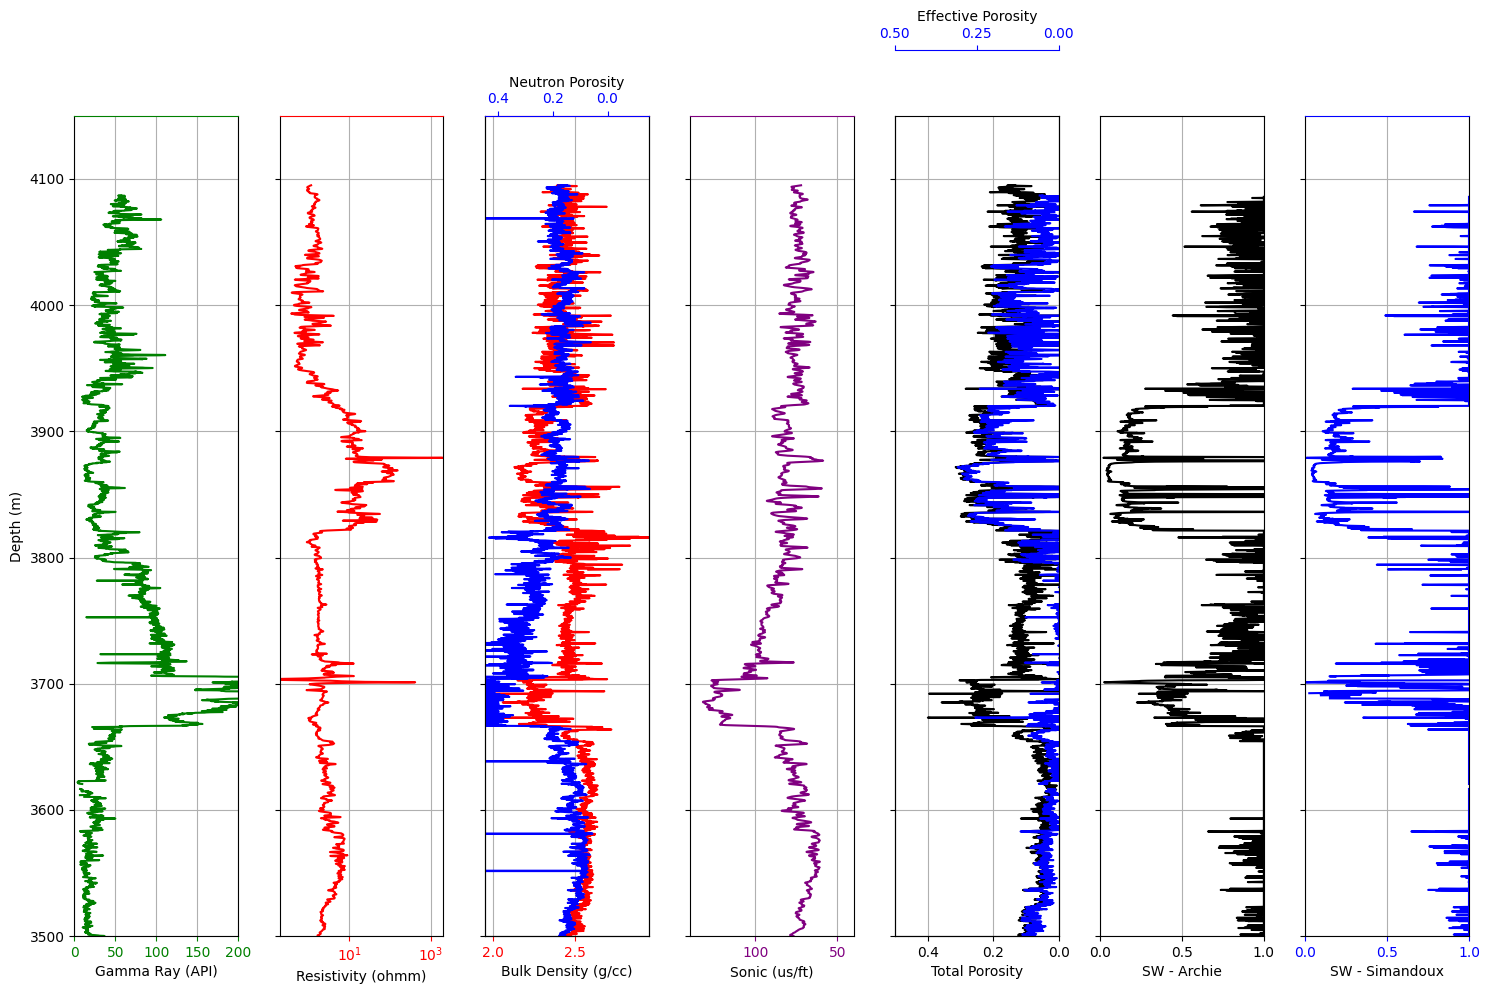

In [77]:
fig = plt.figure(figsize=(15,10))

# Define subplot grid and axes
ax1 = plt.subplot2grid((1,7), (0,0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid((1,7), (0,1), rowspan=1, colspan=1)
ax3 = plt.subplot2grid((1,7), (0,2), rowspan=1, colspan=1)
ax4 = plt.subplot2grid((1,7), (0,3), rowspan=1, colspan=1)
ax5 = ax3.twiny()  # Twin the y-axis for the density track with the neutron track
ax6 = plt.subplot2grid((1,7), (0,4), rowspan=1, colspan=1)
ax7 = ax6.twiny()  # Twin the y-axis for porosity track
ax8 = plt.subplot2grid((1,7), (0,5), rowspan=1, colspan=1)
ax9 = plt.subplot2grid((1,7), (0,6), rowspan=1, colspan=1)

# Plot each track
ax1.plot("GR", "DEPTH", data=well, color="green")
ax1.set_xlabel("Gamma Ray (API)")
ax1.set_xlim(0, 200)
ax1.set_ylabel("Depth (m)")
ax1.tick_params(axis='x', colors="green")
ax1.spines["top"].set_edgecolor("green")
ax1.title.set_color('green')
ax1.set_xticks([0, 50, 100, 150, 200])

ax2.plot("RT", "DEPTH", data=well, color="red")
ax2.set_xlabel("Resistivity (ohmm)")
ax2.set_xlim(0.2, 2000)
ax2.tick_params(axis='x', colors="red")
ax2.spines["top"].set_edgecolor("red")
ax2.set_xticks([0.2, 1, 10, 100, 1000])
ax2.semilogx()

ax3.plot("RHOB", "DEPTH", data=well, color="red")
ax3.set_xlabel("Bulk Density (g/cc)")
ax3.set_xlim(1.95, 2.95)
ax3.tick_params(axis='x', colors="red")
ax3.spines["top"].set_edgecolor("red")

ax4.plot("DT", "DEPTH", data=well, color="purple")
ax4.set_xlabel("Sonic (us/ft)")
ax4.set_xlim(140, 40)
ax4.tick_params(axis='x', colors="purple")
ax4.spines["top"].set_edgecolor("purple")

ax5.plot("NPHI", "DEPTH", data=well, color="blue")
ax5.set_xlabel("Neutron Porosity")
ax5.set_xlim(0.45, -0.15)
ax5.tick_params(axis='x', colors="blue")
ax5.spines["top"].set_edgecolor("blue")

ax6.plot("PHI", "DEPTH", data=well, color="black")
ax6.set_xlabel("Total Porosity")
ax6.set_xlim(0.5, 0)
ax6.tick_params(axis='x', colors="black")
ax6.spines["top"].set_edgecolor("black")

ax7.plot("PHIE_CALC", "DEPTH", data=well, color="blue")
ax7.set_xlabel("Effective Porosity")
ax7.set_xlim(0.5, 0)
ax7.tick_params(axis='x', colors="blue")
ax7.spines["top"].set_edgecolor("blue")
ax7.spines["top"].set_position(("axes", 1.08))  # Adjust this value as needed for your plot
ax7.set_xticks([0, 0.25, 0.5])

ax8.plot("SW_LIM_ARCHIE", "DEPTH", data=well, color="black")
ax8.set_xlabel("SW - Archie")
ax8.set_xlim(0, 1)
ax8.tick_params(axis='x', colors="black")
ax8.spines["top"].set_edgecolor("black")
ax8.set_xticks([0, 0.5, 1])

ax9.plot("SW_LIM_SIMANDOUX", "DEPTH", data=well, color="blue")
ax9.set_xlabel("SW - Simandoux")
ax9.set_xlim(0, 1)
ax9.tick_params(axis='x', colors="blue")
ax9.spines["top"].set_edgecolor("blue")
ax9.set_xticks([0, 0.5, 1])

# Set the y-limits for all axes
for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax8, ax9]:
    ax.set_ylim(4150, 3500)  # Adjust the depth range accordingly
    ax.invert_yaxis()  # Invert the y-axis to have depth increase down

# Set the y-axis to be shared across all subplots
for ax in [ax2, ax3, ax4, ax6, ax8, ax9]:
    ax.sharey(ax1)

# Hide the shared y-axis labels and ticks for all but the first subplot
for ax in [ax2, ax3, ax4, ax6, ax8, ax9]:
    plt.setp(ax.get_yticklabels(), visible=False)

# Add grids to each subplot for better readability
for ax in [ax1, ax2, ax3, ax4, ax6, ax8, ax9]:
    ax.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()